In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('test.csv')

In [ ]:
X=dataset.iloc[:,:-1].values
y_actual=dataset.iloc[:,-1].values

In [ ]:
m = len(y_actual)
# Adding bias term (column of ones) for theta_0
X = np.c_[np.ones((m, 1)), X]

In [ ]:
# Initialize parameters
theta = np.zeros(X.shape[1])  # Initialize theta with zeros

## Cost Function

In [ ]:
def cost_function(y_actual,y_pred):
  m = len(y_actual)
  cost = (1 / 2 * m) * np.sum((y_pred - y_actual) ** 2)
  return cost

In [ ]:
cost = cost_function(y_actual,y_actual)

In [ ]:
cost

0.0

In [ ]:
y_pred=X.dot(0.5)

In [ ]:
y_pred= y_pred[:,-1]

In [ ]:
y_pred

array([38.5, 10.5, 11. , 10. , 18. ,  7.5, 31. , 47.5, 10. ,  2.5,  2. ,
        9.5, 48. , 31. , 18. ,  7.5, 32.5,  7. , 43.5, 34.5, 44.5, 25.5,
       44.5, 13.5, 48.5, 29. , 39.5, 10.5, 46.5, 13.5, 49.5, 15.5, 16.5,
       40. , 14. , 23.5, 26.5, 34.5, 14. , 16.5, 45.5, 35.5, 25. , 38. ,
        2. , 18.5, 35. , 34. , 20. , 17.5, 47. , 44. , 26. , 15.5, 29.5,
        0. , 19.5, 32. , 34.5, 28.5,  6.5, 36. , 38. , 30.5, 41. ,  9. ,
       20.5, 25. , 27.5,  6.5, 23. ,  6.5, 39.5, 26.5,  7.5, 14. , 40.5,
       34.5, 26. , 42. , 34. , 13.5, 28. , 24. , 20. , 19.5, 41. , 50. ,
       29.5, 21.5, 33.5, 19. , 31.5, 45.5, 30. ,  7. , 10.5, 43.5, 36.5,
       16. ,  1. , 41. ,  9.5, 37. , 21. ,  6. ,  0.5, 45. , 44.5,  0. ,
       20.5,  8. , 47. , 48.5, 33. , 12. ,  8.5, 45. ,  6.5,  0. , 32. ,
       48. , 49. ,  6. , 20.5, 23.5, 39. , 10. , 44.5, 14.5, 32. , 37.5,
        6. , 12.5, 14. , 15. , 32.5, 29.5, 32. , 26.5, 35.5, 48.5, 36.5,
        4.5,  6. , 31.5, 49.5, 30. , 17.5,  1. , 30

In [ ]:
cost = cost_function(y_actual,y_pred)
cost

39859398.40887477

## Gradient Decent

In [ ]:
def gradient_descent(X, y_actual, theta, learning_rate, iterations):
    m = len(y_actual)
    cost_history = []

    for _ in range(iterations):
        y_pred = X.dot(theta)  # Predictions
        error = y_pred - y_actual  # Error
        gradient = (1 / m) * X.T.dot(error)  # Compute gradient
        theta -= learning_rate * gradient  # Update theta
        cost_history.append(cost_function(y_actual, y_pred))  # Track cost

    return theta, cost_history

In [ ]:
# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Running Gradient Descent
theta_optimized, cost_history = gradient_descent(X, y_actual, theta, learning_rate, iterations)

# Print results
print("Optimized Theta:", theta_optimized)
print("Final Cost:", cost_history[-1])

Optimized Theta: [nan nan]
Final Cost: nan


<ipython-input-67-63f152e20b23>:3: RuntimeWarning: overflow encountered in scalar multiply
  cost = (1 / 2 * m) * np.sum((y_pred - y_actual) ** 2)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-63f152e20b23>:3: RuntimeWarning: overflow encountered in square
  cost = (1 / 2 * m) * np.sum((y_pred - y_actual) ** 2)


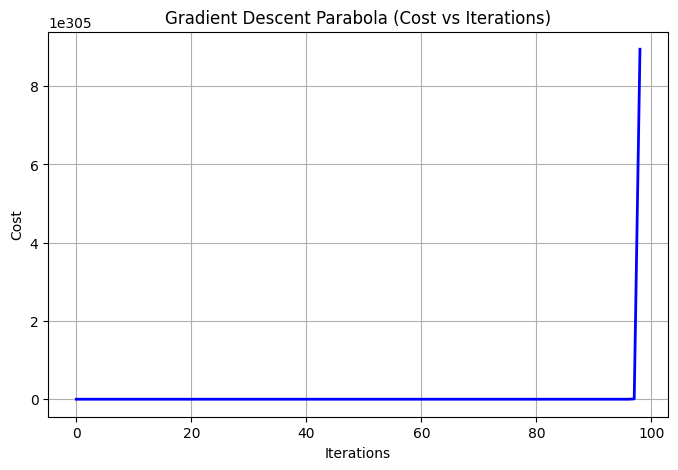

In [ ]:
# Plot cost function vs iterations
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, color='blue', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Parabola (Cost vs Iterations)")
plt.grid(True)
plt.show()

## Plotting Gradient Decent Curve

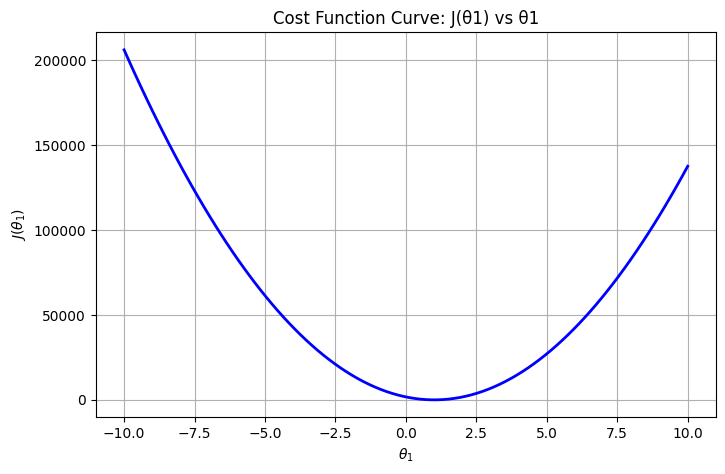

In [ ]:
# Cost Function
def cost_function2(X, y_actual, theta):
    m = len(y_actual)
    y_pred = X.dot(theta)  # Predictions
    cost = (1 / (2 * m)) * np.sum((y_pred - y_actual) ** 2)  # Mean Squared Error Cost Function
    return cost

# Define range for theta_1
theta_1_values = np.linspace(-10, 10, 100)  # Generate 100 values from -10 to 10
cost_values = []  # Store cost values

# Compute cost for each theta_1 while keeping theta_0 fixed
theta_0 = 0  # Assume theta_0 is fixed at 0
for theta_1 in theta_1_values:
    theta = np.array([theta_0, theta_1])  # Only one feature case
    cost_values.append(cost_function2(X, y_actual, theta))

# Plot J(theta1) vs theta1
plt.figure(figsize=(8, 5))
plt.plot(theta_1_values, cost_values, color='blue', linewidth=2)
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$J(\theta_1)$")
plt.title("Cost Function Curve: J(θ1) vs θ1")
plt.grid(True)
plt.show()
